# Projet 4 : Réalisez une étude de santé publique avec Python

Ce Notebook a été réalisé par **Gary MAUGER** en **janvier 2023**. Il donne un panorama de l’état de la malnutrition dans le monde pour l'année 2017, à partir des données de la FAO.

# Sommaire
* [1. Importations](#chapitre1)
    * [1.1. Importation des différentes librairies](#section_1.1.)
    * [1.2. Importation des fichier CSV](#section_1.2.)
* [2. Analyse exploratoire des données](#chapitre2)
    * [2.1. Dataframe "population"](#section_2.1.)
    * [2.2. Dataframe "aide alimentaire"](#section_2.2.)
    * [2.3. Dataframe "sous-nutrition"](#section_2.3.)
    * [2.4. Dataframe "dispo alimentaire"](#section_2.4.)
* [3. Analyses pour Marc](#chapitre3)
    * [3.1. Requête 1 : Proportion de personnes en état de sous-nutrition en 2017](#section_3.1.)
    * [3.2. Requête 2 : Nombre théorique de personnes qui pourraient être nourries](#section_3.2.)
        * [3.2.1. À partir de la disponibilité alimentaire mondiale](#section_3.2.1.)
        * [3.2.2. À partir de la disponibilité alimentaire des produits végétaux](#section_3.2.2.)
    * [3.3. Requête 3 : Utilisation de la disponibilité intérieure](#section_3.3.)
        * [3.3.1. Part qui est attribuée à l’alimentation animale](#section_3.3.1.)
        * [3.3.2. Part qui est perdue](#section_3.3.2.)
        * [3.3.3. Part qui est utilisée pour l'alimentation humaine](#section_3.3.3.)
        * [3.3.4. Répartition mondiale de la disponibilité intérieure](#section_3.3.4.)
* [4. Analyses pour Mélanie](#chapitre4)
    * [4.1. Requête 1 : Pays pour lesquels la proportion de personnes en état de sous-nutrition est la plus forte en 2017](#section_4.1.)
    * [4.2. Requête 2 : Pays qui ont le plus bénéficiés d'aides depuis 2013](#section_4.2.)
    * [4.3. Requête 3 : Pays qui ont le plus de disponibilité alimentaire par habitant](#section_4.3.)
        * [4.3.1. Disponibilité alimentaire en kcal](#section_4.3.1.)
        * [4.3.2. Disponibilité de matière grasse en quantité](#section_4.3.2.)
        * [4.3.3. Disponibilité de protéines en quantité](#section_4.3.3.)
    * [4.4. Requête 4 : Pays qui ont le moins de disponibilité alimentaire par habitant](#section_4.4.)
* [5. Analyses pour Julien](#chapitre5)
    * [5.1. Dataframe "cereales"](#section_5.1.)
    * [5.2. Répartition mondiale de l'utilisation des céréales](#section_5.2.)
    * [5.3. Quelques chiffres intéressants sur les céréales](#section_5.3.)
    * [5.4. Utilisation du Manioc en Thaïlande](#section_5.4.)

# 1. Importations des librairies et des données <a class="anchor" id="chapitre1"></a>

## 1.1. Importation des différentes librairies <a class="anchor" id="section_1.1."></a>
1- Pandas
2- Numpy
3- Matpotlib
4- Seaborn

In [1]:
import pandas as pd #analyse de données
import numpy as np #calculs numériques
import matplotlib.pyplot as plt #graphiques
import seaborn as sns #graphiques

## 1.2. Importation des fichier CSV <a class="anchor" id="section_1.2."></a>

J'ai quatre fichiers à ma disposition :
- *population.csv*
- *aide_alimentaire.csv*
- *dispo_alimentaire*
- *sous_nutrition.csv*

In [2]:
# Importation des données : 4 fichiers excel au format .csv

df_pop = pd.read_csv("population.csv")
df_aide_alim = pd.read_csv("aide_alimentaire.csv")
df_sous_nut = pd.read_csv("sous_nutrition.csv")
df_dispo_alim = pd.read_csv("dispo_alimentaire.csv")

# 2. Analyse exploratoire des données <a class="anchor" id="chapitre2"></a>

La fonction .head() nous sert à afficher les premières lignes afin de vérifier notre importation, la fonction .dtypes nous permet de connaître le type de variable de nos données. La fonction .shape permet de connaître le nbr de lignes et de colonnes. On peut aussi utiliser .info et .describe 

## 2.1. Dataframe "population" <a class="anchor" id="section_2.1."></a>

In [3]:
# Renommage du la colonne Valeur en Population :
df_pop.rename(columns = {"Valeur":"Population"}, inplace = True)

In [4]:
# Mise à l'echelle de la population, et modification du type de données de float à int :
df_pop["Population"] = df_pop["Population"] * 1000
df_pop["Population"] = df_pop["Population"].astype(int)

In [5]:
df_pop.dtypes

Zone          object
Année          int64
Population     int64
dtype: object

In [6]:
dim_pop = df_pop.shape
print("La table population contient", dim_pop[0], "lignes et", dim_pop[1], "colonnes.")
df_pop.head()

La table population contient 1416 lignes et 3 colonnes.


,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


## 2.2. Dataframe "aide alimentaire" <a class="anchor" id="section_2.2."></a>

In [7]:
# Renommage du la colonne Pays bénéficiaire en Zone :
df_aide_alim.rename(columns = {"Pays bénéficiaire":"Zone"}, inplace = True)

In [8]:
df_aide_alim.dtypes

Zone       object
Année       int64
Produit    object
Valeur      int64
dtype: object

In [9]:
print("La taille de la table aide_alimentaire est de", df_aide_alim.shape)
df_aide_alim.head()

La taille de la table aide_alimentaire est de (1475, 4)


,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


## 2.3. Dataframe "sous-nutrition" <a class="anchor" id="section_2.3."></a>

In [10]:
# Remplacement de la période par une année :
df_sous_nut["Année"].replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],["2013","2014","2015","2016","2017","2018"], inplace=True)

In [11]:
# Remplacement de toutes les valeurs NaN par des 0 :
df_sous_nut = df_sous_nut.fillna(0)

In [12]:
# Remplacement des <0.1 par des 0 (on va considérer cette valeur comme négligeable) :
df_sous_nut.replace("<0.1","0",inplace=True)

In [13]:
# Modification du type de données de str à float :
df_sous_nut["Valeur"] = df_sous_nut["Valeur"].astype(float)

In [14]:
# Renommage de Valeur à Population en sous nutrition et mise à l'echelle :
df_sous_nut.rename(columns = {"Valeur":"Population en sous nutrition"}, inplace = True)
df_sous_nut["Population en sous nutrition"] = df_sous_nut["Population en sous nutrition"] * 1000000

In [15]:
# Modification du type de données de Année et Valeur à int :
df_sous_nut[["Année","Population en sous nutrition"]] = df_sous_nut[["Année","Population en sous nutrition"]].astype(int)

In [16]:
df_sous_nut.dtypes

Zone                            object
Année                            int64
Population en sous nutrition     int64
dtype: object

In [17]:
print("La taille de la table sous_nutrition est de", df_sous_nut.shape)
df_sous_nut.head()

La taille de la table sous_nutrition est de (1218, 3)


,Zone,Année,Population en sous nutrition
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000


## 2.4. Dataframe "dispo alimentaire" <a class="anchor" id="section_2.4."></a>

In [18]:
# Remplacement de toutes les valeurs NaN par des 0 :
df_dispo_alim = df_dispo_alim.fillna(0)

In [19]:
print("La taille de la table dispo_alimentaire est de", df_dispo_alim.shape)
df_dispo_alim.head()

La taille de la table dispo_alimentaire est de (15605, 18)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [21]:
# Existe-t-il des valeurs manquantes dans ce df ?
df_dispo_alim.isna().mean()

Zone                                                             0.0
Produit                                                          0.0
Origine                                                          0.0
Aliments pour animaux                                            0.0
Autres Utilisations                                              0.0
Disponibilité alimentaire (Kcal/personne/jour)                   0.0
Disponibilité alimentaire en quantité (kg/personne/an)           0.0
Disponibilité de matière grasse en quantité (g/personne/jour)    0.0
Disponibilité de protéines en quantité (g/personne/jour)         0.0
Disponibilité intérieure                                         0.0
Exportations - Quantité                                          0.0
Importations - Quantité                                          0.0
Nourriture                                                       0.0
Pertes                                                           0.0
Production                        

# 3. Analyses pour Marc <a class="anchor" id="chapitre3"></a>

## 3.1. *Requête 1 : Proportion de personnes en état de sous-nutrition en 2017* <a class="anchor" id="section_3.1."></a>

In [22]:
# Calcul du nombre de personnes en état de sous-nutrition en 2017 :
nbr_pers_sous_nutrition = np.sum(df_sous_nut.loc[df_sous_nut["Année"] == 2017]["Population en sous nutrition"])
print("En 2017 le nombre de personnes en état de sous-nutrition était de :", nbr_pers_sous_nutrition)

En 2017 le nombre de personnes en état de sous-nutrition était de : 535700000


In [23]:
# Calcul de la population mondiale en 2017 :
pop_mondiale_2017 = np.sum(df_pop.loc[df_pop["Année"] == 2017]["Population"])
print("En 2017 la population mondiale était de :", pop_mondiale_2017)

En 2017 la population mondiale était de : 7548134097


In [88]:
# Calcul de la proportion de personnes en état de sous-nutrition dans le monde :
prop_sous_nut_2017 = (nbr_pers_sous_nutrition / pop_mondiale_2017) * 100
print("La proportion de personnes en état de sous-nutrition était de", round(prop_sous_nut_2017,2), "% en 2017.")

La proportion de personnes en état de sous-nutrition était de 7.1 % en 2017.


## 3.2. *Requête 2 : Nombre théorique de personnes qui pourraient être nourries* <a class="anchor" id="section_3.2."></a>

### 3.2.1. À partir de la disponibilité alimentaire mondiale <a class="anchor" id="section_3.2.1."></a>

In [25]:
# Création d'un dataframe de la disponibilité alimentaire totale par pays (en Kcal/pers/jour) :
dispo_tot_pays = df_dispo_alim.groupby("Zone").sum()["Disponibilité alimentaire (Kcal/personne/jour)"]

In [26]:
# Jointure des tables df_pop & dispo_tot_pays (ajout de la population des pays en 2017 au df) :
dispo_tot_pays = pd.merge(df_pop.loc[df_pop["Année"] == 2017, ["Zone","Population"]], dispo_tot_pays, on="Zone")
dispo_tot_pays.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113,2087.0
1,Afrique du Sud,57009756,3020.0
2,Albanie,2884169,3188.0
3,Algérie,41389189,3293.0
4,Allemagne,82658409,3503.0


<AxesSubplot:>

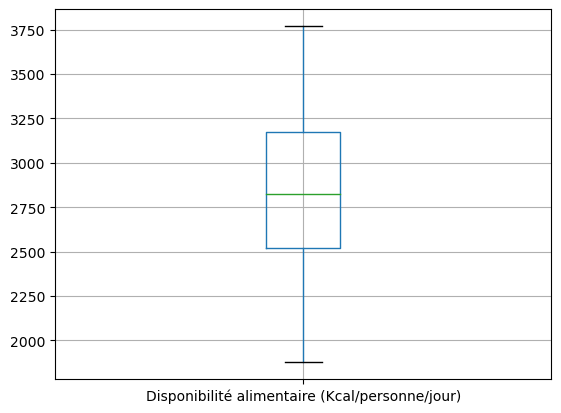

In [27]:
dispo_tot_pays.boxplot("Disponibilité alimentaire (Kcal/personne/jour)")

In [28]:
# Calcul du nombre de calories disponibles dans le monde :
kcal_dispo_monde = np.sum(dispo_tot_pays["Population"]*dispo_tot_pays["Disponibilité alimentaire (Kcal/personne/jour)"])
print("Il y a", round(kcal_dispo_monde), "calories disponibles dans le monde")

Il y a 20918984609007 calories disponibles dans le monde


In [29]:
# Nombre de Kcal nécessaires/jour/personne en moyenne :
calories_personne = 2400

In [30]:
# Calcul du nombre de personnes qui pourraient être nourries sur une base 2400 Kcal/j :
perso_theo = (kcal_dispo_monde / calories_personne)
print("Population mondiale en 2017 :", pop_mondiale_2017)
print("Nombre théorique de personnes qui pourraient être nourries :", round(perso_theo))

Population mondiale en 2017 : 7548134097
Nombre théorique de personnes qui pourraient être nourries : 8716243587


In [31]:
# Calcul du pourcentage de la population qu'on aurait pu nourrir en 2017 :
pourcentage_theo = ((perso_theo / pop_mondiale_2017)*100)
print("Sur une base de 2400 Kcal/j/personne, on aurait pu théoriquement nourrir", round(pourcentage_theo), "% de la population mondiale en 2017.")

Sur une base de 2400 Kcal/j/personne, on aurait pu théoriquement nourrir 115 % de la population mondiale en 2017.


### 3.2.2. À partir de la disponibilité alimentaire des produits végétaux <a class="anchor" id="section_3.2.2."></a>

In [89]:
# Premier filtre pour ne garder que les aliments végétaux :
dispo_alim_vege = df_dispo_alim.loc[df_dispo_alim["Origine"] == "vegetale"]

In [33]:
# Création d'un df de la disponibilité alimentaire totale des produits végétaux par pays (en Kcal/pers/jour) :
dispo_tot_vege_pays = dispo_alim_vege.groupby("Zone").sum()["Disponibilité alimentaire (Kcal/personne/jour)"]

In [34]:
# Jointure des tables df_pop & dispo_tot_vege_pays (ajout de la population des pays en 2017 au df) :
dispo_tot_vege_pays = pd.merge(df_pop.loc[df_pop["Année"] == 2017, ["Zone","Population"]], dispo_tot_vege_pays, on="Zone")
dispo_tot_vege_pays.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113,1871.0
1,Afrique du Sud,57009756,2533.0
2,Albanie,2884169,2203.0
3,Algérie,41389189,2915.0
4,Allemagne,82658409,2461.0


In [35]:
# Calcul du nombre de calories végétales disponibles dans le monde :
kcal_vege_dispo_monde = np.sum(dispo_tot_vege_pays["Population"]*dispo_tot_vege_pays["Disponibilité alimentaire (Kcal/personne/jour)"])
print("Il y a", round(kcal_vege_dispo_monde), "calories disponibles dans le monde")

Il y a 17260764197424 calories disponibles dans le monde


In [36]:
# Calcul du nombre de personnes qui pourraient être nourries avec les Kcal végétales sur une base 2400 Kcal/j :
perso_theo_vege = (kcal_vege_dispo_monde / calories_personne)
print("Population mondiale en 2017 :", pop_mondiale_2017)
print("Nombre théorique de personnes qui pourraient être nourries avec les calories végétales disponibles :", round(perso_theo_vege))

Population mondiale en 2017 : 7548134097
Nombre théorique de personnes qui pourraient être nourries avec les calories végétales disponibles : 7191985082


In [37]:
# Calcul du pourcentage de la population qu'on aurait pu nourrir avec les calories végétales en 2017 :
pourcentage_theo_vege = ((perso_theo_vege / pop_mondiale_2017)*100)
print("Sur une base de 2400 Kcal/j/personne, on aurait pu théoriquement nourrir", round(pourcentage_theo_vege), "% de la population mondiale en 2017.")

Sur une base de 2400 Kcal/j/personne, on aurait pu théoriquement nourrir 95 % de la population mondiale en 2017.


## 3.3. *Requête 3 : Utilisation de la disponibilité intérieure* <a class="anchor" id="section_3.3."></a>

Disponibilité intérieure = Production + Importation - Exportation + Variation des stocks
                         = Nourriture + Animaux + Perte + Semence + Traitement + Autres

### 3.3.1. Part  qui est attribuée à l’alimentation animale <a class="anchor" id="section_3.3.1."></a>

In [38]:
# Création d'un df avec les variables qui nous intéressent :
df_dispo_alim_part = df_dispo_alim[["Zone","Aliments pour animaux","Disponibilité intérieure",]]

In [39]:
# Ajout d'une colonne qui nous donne la part qui est attribuée à l'alimentation animale par pays :
df_dispo_alim_part = df_dispo_alim_part.groupby("Zone").sum()[["Aliments pour animaux","Disponibilité intérieure"]]
df_dispo_alim_part["% alimentation animale"] = ((df_dispo_alim_part["Aliments pour animaux"] / df_dispo_alim_part["Disponibilité intérieure"])*100)
df_dispo_alim_part.head()

,Aliments pour animaux,Disponibilité intérieure,% alimentation animale
Zone,,,
Afghanistan,768.0,13515.0,5.682575
Afrique du Sud,5309.0,61256.0,8.666906
Albanie,660.0,4758.0,13.871375
Algérie,4352.0,42630.0,10.208773
Allemagne,30209.0,162275.0,18.615930


In [90]:
# Vérification des valeurs pour le % :
df_dispo_alim_part.describe()

,Aliments pour animaux,Disponibilité intérieure,% alimentation animale
count,174.000000,1.740000e+02,174.000000
mean,7495.660920,5.660341e+04,12.024054
std,29613.064847,2.008030e+05,9.754659
min,0.000000,5.900000e+01,0.000000
25%,113.000000,2.854500e+03,3.548217
50%,959.500000,1.113200e+04,10.223261
75%,4427.750000,3.122925e+04,17.821802
max,345951.000000,2.036726e+06,39.672895


In [41]:
# Calcul de l'alimentation animale mondiale totale (en milliers de tonnes) :
alim_animaux = np.sum(df_dispo_alim_part["Aliments pour animaux"])

In [42]:
# Calcul de la disponibilité intérieure mondiale totale (en milliers de tonnes) :
dispo_int_tot = np.sum(df_dispo_alim_part["Disponibilité intérieure"])

In [43]:
# Calcul du pourcentage de la disponibilité intérieure mondiale attribuée à l'alimentation animale :
part_alim_animale = round(((alim_animaux / dispo_int_tot)*100),2)
print(part_alim_animale, "% de la disponibilité intérieure mondiale est attribuée à l'alimentation animale.")

13.24 % de la disponibilité intérieure mondiale est attribuée à l'alimentation animale.


### 3.3.2. Part qui est perdue <a class="anchor" id="section_3.3.2."></a>

In [44]:
# Création d'un df avec les pertes et la disponibilité intérieure totale par pays (en milliers de tonnes) :
dispo_alim_pertes = df_dispo_alim[["Zone","Pertes","Disponibilité intérieure",]].groupby("Zone").sum()[["Pertes","Disponibilité intérieure"]]

In [45]:
# Ajout d'une colonne qui nous donne la part de pertes par pays :
dispo_alim_pertes["% de pertes"] = ((dispo_alim_pertes["Pertes"] / dispo_alim_pertes["Disponibilité intérieure"])*100)

In [46]:
dispo_alim_pertes.head()

,Pertes,Disponibilité intérieure,% de pertes
Zone,,,
Afghanistan,1135.0,13515.0,8.398076
Afrique du Sud,2193.0,61256.0,3.580057
Albanie,276.0,4758.0,5.800757
Algérie,3753.0,42630.0,8.803659
Allemagne,3781.0,162275.0,2.329995


In [47]:
# Calcul de la perte mondiale totale (en milliers de tonnes) :
perte_mondiale_tot = np.sum(dispo_alim_pertes["Pertes"])

In [48]:
# Calcul du pourcentage de la disponibilité intérieure mondiale qui est perdue :
part_perte_mondiale = round(((perte_mondiale_tot / dispo_int_tot)*100),2)
print(part_perte_mondiale, "% de la disponibilité intérieure mondiale est perdue.")

4.61 % de la disponibilité intérieure mondiale est perdue.


### 3.3.3. Part qui est utilisée pour l'alimentation humaine <a class="anchor" id="section_3.3.3."></a>

In [49]:
# Création d'un df avec la disponibilité intérieure totale par pays et son utilisation pour l'alimentation humaine (en milliers de tonnes) :
dispo_alim_humaine = df_dispo_alim[["Zone","Nourriture","Disponibilité intérieure",]].groupby("Zone").sum()[["Nourriture","Disponibilité intérieure"]]
dispo_alim_humaine["% utilisé pour l'alimentation humaine"] = ((dispo_alim_humaine["Nourriture"] / dispo_alim_humaine["Disponibilité intérieure"])*100)

In [50]:
dispo_alim_humaine.head()

,Nourriture,Disponibilité intérieure,% utilisé pour l'alimentation humaine
Zone,,,
Afghanistan,10735.0,13515.0,79.430263
Afrique du Sud,29812.0,61256.0,48.667886
Albanie,3476.0,4758.0,73.055906
Algérie,31729.0,42630.0,74.428806
Allemagne,79238.0,162275.0,48.829456


In [51]:
# Calcul de l'alimentation humaine totale (en milliers de tonnes) :
alim_mondiale_tot = np.sum(dispo_alim_humaine["Nourriture"])

In [91]:
# Calcul du pourcentage de la disponibilité intérieure mondiale qui est utilisée pour l'alimentation humaine :
part_alim_mondiale = round(((alim_mondiale_tot / dispo_int_tot)*100),2)
print(part_alim_mondiale, "% de la disponibilité intérieure mondiale est attribuée à l'alimentation humaine.")

49.51 % de la disponibilité intérieure mondiale est attribuée à l'alimentation humaine.


### 3.3.4. Répartition mondiale de la disponibilité intérieure <a class="anchor" id="section_3.3.4."></a>

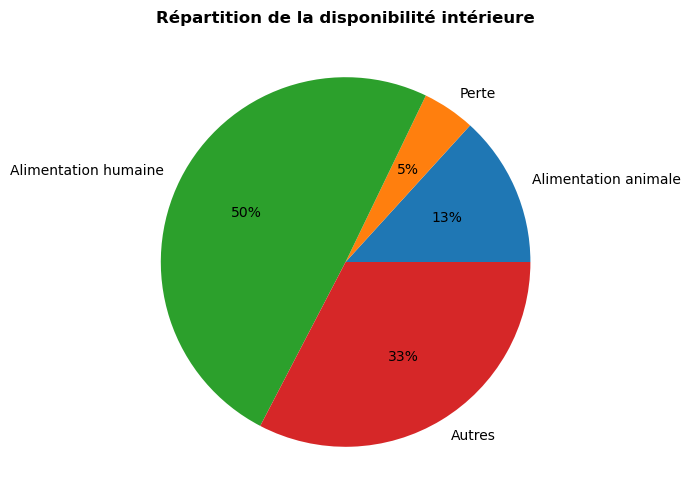

In [92]:
# Diagramme circulaire montrant la répartition mondiale de la disponibilité intérieure :
repartition = ["Alimentation animale", part_alim_animale], ["Perte", part_perte_mondiale], ["Alimentation humaine", part_alim_mondiale], ["Autres", round((100 - part_alim_animale - part_alim_mondiale - part_perte_mondiale),2)]
dfrep = pd.DataFrame(repartition,columns=["Nom","Part"])
plt.figure(figsize=(10,6))
plt.pie(x=dfrep["Part"], labels=dfrep["Nom"], autopct="%.f%%")
plt.title("Répartition de la disponibilité intérieure", fontsize = 12, fontweight="bold")
plt.show()

# 4. Analyses pour Mélanie <a class="anchor" id="chapitre4"></a>

## 4.1. Requête 1 : *Pays pour lesquels la proportion de personnes en état de sous-nutrition est la plus forte en 2017* <a class="anchor" id="section_4.1."></a>

In [54]:
# Filtrage pour ne garder que 2017 et ajout de la population de chaque pays :
df_sous_nut_2017 = df_sous_nut.loc[df_sous_nut["Année"] == 2017,["Zone","Population en sous nutrition"]]
df_sous_nut_2017 = pd.merge(df_pop.loc[df_pop["Année"] == 2017, ["Zone","Population"]], df_sous_nut_2017, on="Zone")
df_sous_nut_2017.head()

,Zone,Population,Population en sous nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0


In [55]:
# Ajout d'une variable "% de la population en sous-nutrition" :
df_sous_nut_2017["% de la population en sous nutrition"] = round(((df_sous_nut_2017["Population en sous nutrition"] / df_sous_nut_2017["Population"])*100),2)

In [56]:
df_sous_nut_2017["Part de la population mondiale en sous nutrition"] = round(((df_sous_nut_2017["Population en sous nutrition"] / nbr_pers_sous_nutrition)*100),2)

In [57]:
# Classement des 10 pays ou la part de la population en sous-nutrition est la plus forte :
df_sous_nut_2017 = df_sous_nut_2017.sort_values("% de la population en sous nutrition", ascending = False).head(10)

In [58]:
df_sous_nut_2017.reset_index(drop=True)

,Zone,Population,Population en sous nutrition,% de la population en sous nutrition,Part de la population mondiale en sous nutrition
0,Haïti,10982366,5300000,48.26,0.99
1,République populaire démocratique de Corée,25429825,12000000,47.19,2.24
2,Madagascar,25570512,10500000,41.06,1.96
3,Libéria,4702226,1800000,38.28,0.34
4,Lesotho,2091534,800000,38.25,0.15
5,Tchad,15016753,5700000,37.96,1.06
6,Rwanda,11980961,4200000,35.06,0.78
7,Mozambique,28649018,9400000,32.81,1.75
8,Timor-Leste,1243258,400000,32.17,0.07
9,Afghanistan,36296113,10500000,28.93,1.96


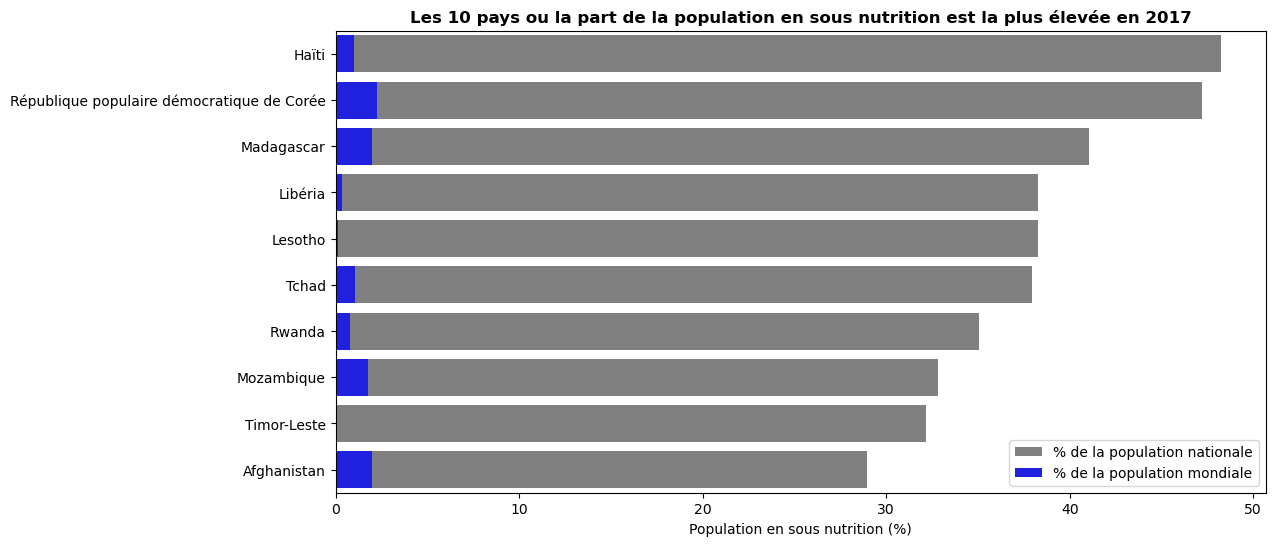

In [95]:
# Diagramme à bâtons montrant les 10 pays ou la part de la population en sous nutrition est la plus élevée en 2017 :
plt.figure(figsize=(12,6))
sns.barplot(y=df_sous_nut_2017['Zone'], x=df_sous_nut_2017["% de la population en sous nutrition"], color="gray", label="% de la population nationale")
sns.barplot(y=df_sous_nut_2017['Zone'], x=df_sous_nut_2017["Part de la population mondiale en sous nutrition"], color="blue", label="% de la population mondiale")
plt.title("Les 10 pays ou la part de la population en sous nutrition est la plus élevée en 2017", fontsize = 12, fontweight="bold")
plt.xlabel("Population en sous nutrition (%)")
plt.ylabel("")
plt.legend()
plt.show()

## 4.2. Requête 2 : *Pays qui ont le plus bénéficiés d'aides depuis 2013* <a class="anchor" id="section_4.2."></a>

In [93]:
# Regroupement l'aide totale par pays et par année (en tonnes) :
df_aide_alim_pays = df_aide_alim.groupby(["Zone","Année"],as_index=False).sum()

In [61]:
df_aide_alim_pays.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238
1,Afghanistan,2014,57214
2,Algérie,2013,35234
3,Algérie,2014,18980
4,Algérie,2015,17424


In [94]:
# Classement des 10 pays qui ont le plus reçu d'aide alimentaire (en tonnes) depuis 2013 :
df_aide_alim_tot_pays = df_aide_alim.groupby("Zone", as_index=False).sum().sort_values("Valeur", ascending = False).nlargest(10, "Valeur").drop("Année", axis=1)
df_aide_alim_tot_pays.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


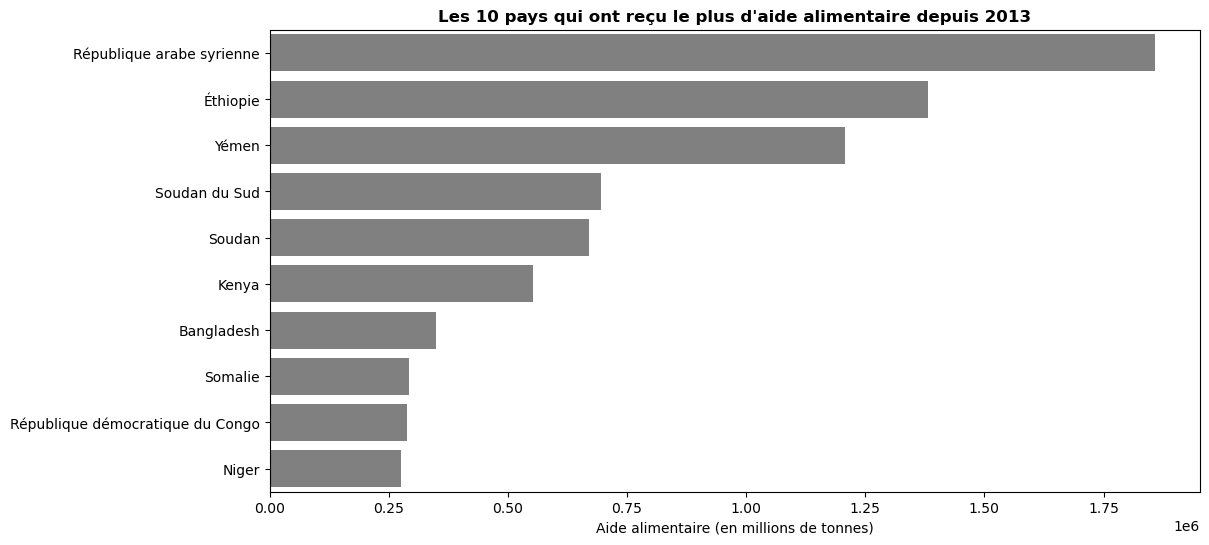

In [96]:
# Diagramme à bâtons montrant les 10 pays qui ont le plus reçu d'aide alimentaire depuis 2013 :
plt.figure(figsize=(12, 6))
sns.barplot(x=df_aide_alim_tot_pays["Valeur"], y=df_aide_alim_tot_pays['Zone'], color="gray", label="Valeur", ci=None)
plt.title("Les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013", fontsize = 12, fontweight="bold")
plt.xlabel("Aide alimentaire (en millions de tonnes)")
plt.ylabel("")
plt.show()

## 4.3. Requête 3 : *Pays qui ont le plus de disponibilité alimentaire par habitant* <a class="anchor" id="section_4.3."></a>

In [64]:
# Filtrage du df_dispo_alim pour ne conserver que les variables qui concernent la disponibilité alimentaire
df_dispo_alim_hab = df_dispo_alim.groupby("Zone")[["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)"]].sum()

### 4.3.1. Disponibilité alimentaire en kcal <a class="anchor" id="section_4.3.1."></a>

In [65]:
# Classement des 10 pays qui ont le plus de disponibilité alimentaire (Kcal/jour) par habitant :
df_dispo_alim_hab.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending = False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
Zone,,,,
Autriche,3770.0,170.44,106.20,1069.20
Belgique,3737.0,161.95,99.37,1002.09
Turquie,3708.0,119.64,108.12,968.15
États-Unis d'Amérique,3682.0,161.37,109.42,1002.39
Israël,3610.0,151.39,128.00,922.14
Irlande,3602.0,125.69,109.91,1150.15
Italie,3578.0,154.69,108.49,993.20
Luxembourg,3540.0,141.49,113.64,1150.66
Égypte,3518.0,63.09,103.22,803.79


### 4.3.2. Disponibilité de matière grasse en quantité <a class="anchor" id="section_4.3.2."></a>

In [66]:
# Classement avec la disponibilité de matière grasse en quantité (g/personne/jour) :
df_dispo_alim_hab.sort_values("Disponibilité de matière grasse en quantité (g/personne/jour)", ascending = False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
Zone,,,,
Autriche,3770.0,170.44,106.20,1069.20
Belgique,3737.0,161.95,99.37,1002.09
États-Unis d'Amérique,3682.0,161.37,109.42,1002.39
France,3482.0,159.15,110.50,937.43
Italie,3578.0,154.69,108.49,993.20
Suisse,3393.0,153.35,92.89,989.35
Israël,3610.0,151.39,128.00,922.14
Islande,3381.0,151.35,133.06,923.29
Australie,3278.0,150.81,106.26,941.76


### 4.3.3. Disponibilité de protéines en quantité <a class="anchor" id="section_4.3.3."></a>

In [67]:
# Classement avec la disponibilité de protéines en quantité (g/personne/jour) :
df_dispo_alim_hab.sort_values("Disponibilité de protéines en quantité (g/personne/jour)", ascending = False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
Zone,,,,
Islande,3381.0,151.35,133.06,923.29
Chine - RAS de Hong-Kong,3286.0,139.82,129.07,802.17
Israël,3610.0,151.39,128.00,922.14
Lituanie,3414.0,94.44,124.36,1050.07
Maldives,2733.0,62.93,122.32,821.36
Finlande,3366.0,140.02,117.56,1093.77
Luxembourg,3540.0,141.49,113.64,1150.66
Monténégro,3490.0,131.66,111.90,1210.41
Pays-Bas,3222.0,125.30,111.46,1069.22


## 4.4. Requête 4 : *Pays qui ont le moins de disponibilité alimentaire par habitant* <a class="anchor" id="section_4.4."></a>

In [68]:
# Classement des 10 pays qui ont le moins de disponibilité alimentaire (Kcal/jour) par habitant :
df_dispo_alim_hab.sort_values("Disponibilité alimentaire (Kcal/personne/jour)").head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
Zone,,,,
République centrafricaine,1879.0,59.41,46.04,453.73
Zambie,1924.0,42.05,55.22,350.12
Madagascar,2056.0,24.49,46.69,425.07
Afghanistan,2087.0,33.50,58.26,351.41
Haïti,2089.0,48.92,47.70,397.78
République populaire démocratique de Corée,2093.0,36.41,54.99,458.93
Tchad,2109.0,47.10,62.75,319.45
Zimbabwe,2113.0,57.18,48.32,336.59
Ouganda,2126.0,46.57,52.64,535.58


# 5. Analyses pour Julien <a class="anchor" id="chapitre5"></a>

## 5.1. Dataframe "cereales" <a class="anchor" id="section_5.1."></a>

Liste des céréales : "Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"

In [97]:
# Liste des céréales récupérée sur le site de la FAO :
cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [70]:
# Création d'un dataframe de la disponibilité alimentaire pour les céréales :
df_cereales = df_dispo_alim.loc[df_dispo_alim["Produit"].isin(cereales)]
df_cereales["Produit"].unique()

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

In [71]:
# Variables utilisées par la suite :
cereales_tot = df_cereales["Disponibilité intérieure"].sum()
prod_mondiale_cereales = df_cereales["Production"].sum()
expor_mondiale_cereales = df_cereales["Exportations - Quantité"].sum()
impor_mondiale_cereales = df_cereales["Importations - Quantité"].sum()
utilisation_animale = df_cereales["Aliments pour animaux"].sum()
utilisation_humaine = df_cereales["Nourriture"].sum()
perte_mondiale_cereales = df_cereales["Pertes"].sum()
var_stock = df_cereales["Variation de stock"].sum()

## 5.2. Répartition mondiale de l'utilisation des céréales <a class="anchor" id="section_5.2."></a>

In [72]:
# Calcul de la part des céréales destinées à l'alimentation animale :
part_animale = round((utilisation_animale / cereales_tot) * 100,2)
print(part_animale, "% des céréales sont utilisées pour l'alimentation animale.")

36.29 % des céréales sont utilisées pour l'alimentation animale.


In [73]:
# Calcul de la part des céréales destinées à l'alimentation humaine :
part_humaine = round((utilisation_humaine / cereales_tot) * 100,2)
print(part_humaine, "% des céréales sont utilisées pour l'alimentation humaine.")

42.75 % des céréales sont utilisées pour l'alimentation humaine.


In [74]:
# Calcul de la part des céréales perdues :
perte_cereales = round((perte_mondiale_cereales / cereales_tot) * 100,2)
print(perte_cereales, "% des céréales sont perdues.")

4.45 % des céréales sont perdues.


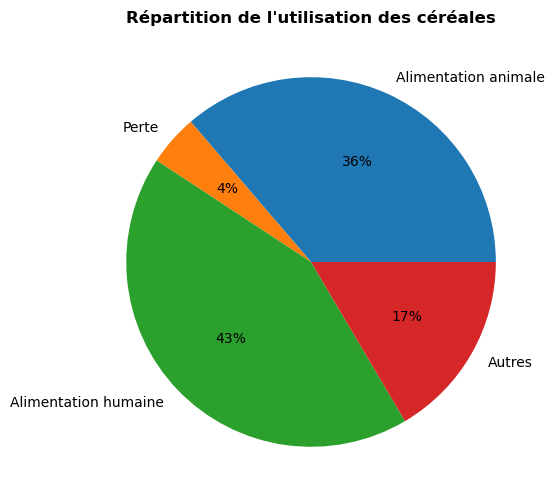

In [98]:
# Diagramme circulaire montrant la répartition mondiale de l'utilisation des céréales :
repartition = ["Alimentation animale", part_animale], ["Perte", perte_cereales], ["Alimentation humaine", part_humaine], ["Autres", round((100 - part_animale - part_humaine - perte_cereales),2)]
dfrep = pd.DataFrame(repartition,columns=["Nom","Part"])
plt.figure(figsize=(10,6))
plt.pie(x=dfrep["Part"], labels=dfrep["Nom"], autopct="%.f%%")
plt.title("Répartition de l'utilisation des céréales", fontsize = 12, fontweight="bold")
plt.show()

## 5.3. Quelques chiffres intéressants sur les céréales <a class="anchor" id="section_5.3."></a>

In [76]:
# Classement des 10 plus gros producteurs de céréales avec ajout de la "Part de la production mondiale" :
top_10_prod = df_cereales.groupby("Zone").sum().sort_values("Production", ascending=False)
top_10_prod["Part de la production mondiale"] = round((top_10_prod["Production"] / prod_mondiale_cereales)*100,2)
top_10_prod[["Production","Part de la production mondiale"]].reset_index().head(10)

,Zone,Production,Part de la production mondiale
0,"Chine, continentale",485073.0,19.22
1,États-Unis d'Amérique,433686.0,17.19
2,Inde,240926.0,9.55
3,Brésil,97157.0,3.85
4,Fédération de Russie,90073.0,3.57
5,France,67469.0,2.67
6,Canada,66406.0,2.63
7,Indonésie,66056.0,2.62
8,Ukraine,62638.0,2.48
9,Argentine,51398.0,2.04


In [77]:
# Classement des 10 plus gros exportateurs de céréales :
top_10_expor = df_cereales.groupby("Zone").sum().sort_values("Exportations - Quantité", ascending=False)
top_10_expor["Part des exportations mondiales"] = round((top_10_prod["Exportations - Quantité"] / expor_mondiale_cereales)*100,2)
top_10_expor[["Exportations - Quantité","Part des exportations mondiales"]].reset_index().head(10)

,Zone,Exportations - Quantité,Part des exportations mondiales
0,États-Unis d'Amérique,66302.0,15.59
1,France,36893.0,8.67
2,Argentine,29821.0,7.01
3,Brésil,28922.0,6.80
4,Ukraine,27789.0,6.53
5,Canada,27245.0,6.41
6,Australie,25951.0,6.10
7,Inde,24546.0,5.77
8,Fédération de Russie,19557.0,4.60
9,Allemagne,16721.0,3.93


In [78]:
# Classement des 10 plus gros importateurs de céréales :
top_10_impor = df_cereales.groupby("Zone").sum().sort_values("Importations - Quantité", ascending=False)
top_10_impor["Part des importations mondiales"] = round((top_10_prod["Importations - Quantité"] / impor_mondiale_cereales)*100,2)
top_10_impor[["Importations - Quantité","Part des importations mondiales"]].reset_index().head(10)

,Zone,Importations - Quantité,Part des importations mondiales
0,Japon,25502.0,6.38
1,Arabie saoudite,16490.0,4.12
2,Égypte,16265.0,4.07
3,"Chine, continentale",14786.0,3.70
4,République de Corée,14562.0,3.64
5,Mexique,14473.0,3.62
6,États-Unis d'Amérique,13477.0,3.37
7,Pays-Bas,12179.0,3.04
8,Italie,11651.0,2.91
9,Iran (République islamique d'),11479.0,2.87


In [79]:
# Classement des 10 pays ou il y a le plus de pertes :
top_10_pertes = df_cereales.groupby("Zone").sum().sort_values("Pertes", ascending=False)
top_10_pertes["% des pertes totales"] = round((top_10_prod["Pertes"] / perte_mondiale_cereales)*100,2)
top_10_pertes[["Pertes","% des pertes totales"]].reset_index().head(10)

,Zone,Pertes,% des pertes totales
0,"Chine, continentale",20199.0,18.86
1,Inde,12059.0,11.26
2,Brésil,9775.0,9.13
3,Indonésie,5077.0,4.74
4,Turquie,3829.0,3.57
5,Égypte,3710.0,3.46
6,Mexique,3286.0,3.07
7,Viet Nam,3000.0,2.80
8,Nigéria,2550.0,2.38
9,Bangladesh,2036.0,1.90


In [80]:
# Classement des céréales par quantité produite :
clas = df_cereales.groupby("Produit", as_index=False).sum().sort_values("Production", ascending=False)
clas["Nourriture+Animaux"] = round((clas["Nourriture"] + clas["Aliments pour animaux"]),)
clas["Nourriture+Animaux+Pertes"] = round((clas["Nourriture"] + clas["Aliments pour animaux"] + clas["Pertes"]),)
clas

,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Nourriture+Animaux,Nourriture+Animaux+Pertes
3,Maïs,546116.0,189386.0,30903.0,3690.37,271.50,771.12,955799.0,128787.0,122691.0,125184.0,40701.0,1017029.0,6837.0,47648.0,-55136.0,671300.0,712001.0
1,Blé,129668.0,22424.0,96132.0,12339.51,548.76,2809.21,679498.0,198380.0,185377.0,457824.0,27530.0,708443.0,34283.0,7877.0,-15948.0,587492.0,615022.0
6,Riz (Eq Blanchi),33594.0,18464.0,53024.0,5384.46,123.95,1027.25,475656.0,41445.0,37618.0,377286.0,27378.0,495447.0,12194.0,6740.0,-15958.0,410880.0,438258.0
5,Orge,92658.0,654.0,1814.0,263.60,7.35,52.28,140439.0,41585.0,38689.0,6794.0,4628.0,142462.0,8804.0,26910.0,876.0,99452.0,104080.0
8,Sorgho,24808.0,2049.0,4952.0,614.02,48.34,146.16,58237.0,6388.0,6418.0,24153.0,2746.0,62116.0,788.0,3695.0,-3913.0,48961.0,51707.0
4,Millet,3306.0,196.0,3966.0,513.09,37.27,96.11,29911.0,276.0,343.0,23040.0,2276.0,28909.0,682.0,403.0,933.0,26346.0,28622.0
2,"Céréales, Autres",19035.0,1388.0,1483.0,193.74,5.46,40.52,27485.0,2540.0,2882.0,5324.0,785.0,28412.0,1203.0,160.0,-1267.0,24359.0,25144.0
0,Avoine,16251.0,206.0,880.0,151.43,15.29,35.70,23407.0,3531.0,3708.0,3903.0,514.0,23816.0,2485.0,36.0,-577.0,20154.0,20668.0
7,Seigle,8099.0,20.0,1967.0,263.36,8.62,51.56,16567.0,2372.0,2251.0,5502.0,562.0,16711.0,1262.0,1120.0,-25.0,13601.0,14163.0


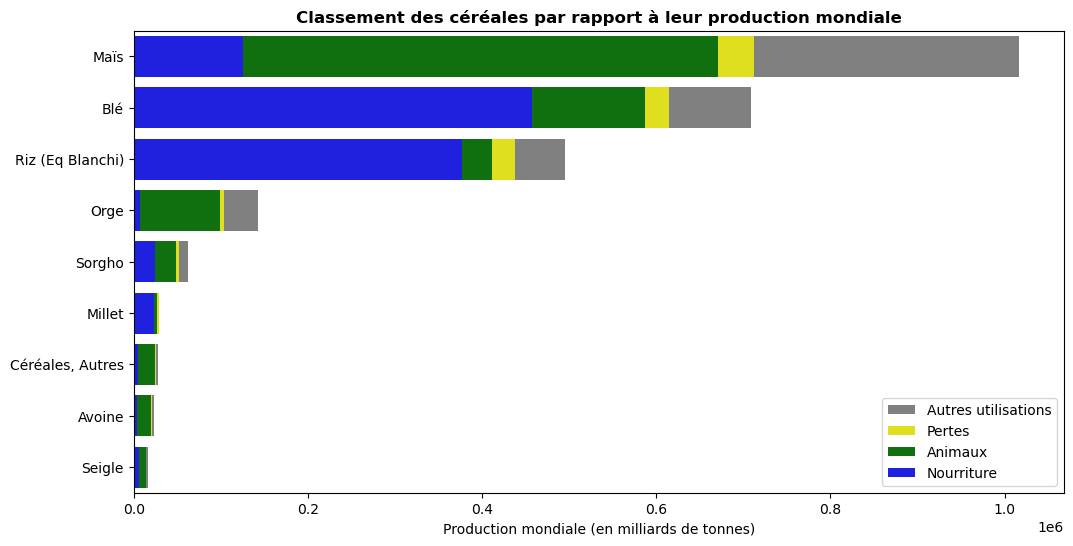

In [99]:
# Diagramme à bâtons du classement de la production en faisant apparaitre l'utilisation des céréales :
plt.figure(figsize=(12,6))
sns.barplot(y=clas["Produit"], x=clas["Production"], color="gray", label="Autres utilisations")
sns.barplot(y=clas["Produit"], x=clas["Nourriture+Animaux+Pertes"], color="yellow", label="Pertes")
sns.barplot(y=clas["Produit"], x=clas["Nourriture+Animaux"], color="green", label="Animaux")
sns.barplot(y=clas["Produit"], x=clas["Nourriture"], color="blue", label="Nourriture")
plt.title("Classement des céréales par rapport à leur production mondiale", fontsize = 12, fontweight="bold")
plt.xlabel("Production mondiale (en milliards de tonnes)")
plt.ylabel("")
plt.legend()
plt.show()

## 5.4. Utilisation du Manioc en Thaïlande <a class="anchor" id="section_5.4."></a>

In [82]:
# On reprend le df dispo_alim pour regarder le Manioc en Thaïlande :
manioc_thailande = df_dispo_alim.loc[(df_dispo_alim["Produit"] == "Manioc") & (df_dispo_alim["Zone"] == "Thaïlande")]
manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [83]:
export_manioc_thailande = manioc_thailande["Exportations - Quantité"]
prod_manioc_thailande = manioc_thailande["Production"]

In [101]:
# Calcul de la proportion de Manioc exportée sur la production totale :
part_export_manioc_thailande = round((float)(export_manioc_thailande / prod_manioc_thailande)*100,2)
print("La Thaïlande exporte", part_export_manioc_thailande, "% de sa production de manioc.")

La Thaïlande exporte 83.41 % de sa production de manioc.


In [100]:
# Calcul de la proportion de Manioc qui sert à l'alimentation de la population locale :
part_alim_manioc_thai = round((float)(manioc_thailande["Nourriture"] / manioc_thailande["Production"])*100,2)
print("Seulement", part_alim_manioc_thai, "% de sa production de manioc sert à l'alimentation de la population locale.")

Seulement 2.88 % de sa production de manioc sert à l'alimentation de la population locale.


In [86]:
# Proportion de personnes en sous nutrition en Thaïlande :
thai = df_sous_nut.loc[(df_sous_nut["Zone"] == "Thaïlande") & (df_sous_nut["Année"] == 2017)]
df_thai_2017 = pd.merge(df_pop.loc[df_pop["Année"] == 2017, ["Zone","Population"]], thai, on="Zone")
population_thai = round((float)(df_thai_2017["Population"]))
population_sous_nut_thai = round((float)(df_thai_2017["Population en sous nutrition"]))
part_sous_nut_thai = round((float)(df_thai_2017["Population en sous nutrition"] / df_thai_2017["Population"])*100,2)
print("Sur", population_thai, "d'habitants, la Thaïlande en compte", population_sous_nut_thai, "en sous nutrition, soit", part_sous_nut_thai, "% de sa population totale.")

Sur 69209810 d'habitants, la Thaïlande en compte 6200000 en sous nutrition, soit 8.96 % de sa population totale.


In [87]:
# Part de la population Thaïlandaise que l'on pourrait nourrir (Valeur énergétique du Manioc : 1590 kcal) :
export_manioc_thailande_kg = export_manioc_thailande * 1000000
kcal_manioc_export = ((export_manioc_thailande_kg * 1590) / 365)
nb_pers_alim = round((float)(kcal_manioc_export / 2400))
part_pop_thailande = round(((float)(nb_pers_alim / population_thai) * 100),2)
print("Si l'exportation de Manioc thaïlandais servait à nourrir la population, on pourrait nourrir", nb_pers_alim, "personnes (sur une base de 1590 kcal pour le Manioc), cela représente", part_pop_thailande, "% de la population thaïlandaise.")

Si l'exportation de Manioc thaïlandais servait à nourrir la population, on pourrait nourrir 45765137 personnes (sur une base de 1590 kcal pour le Manioc), cela représente 66.13 % de la population thaïlandaise.
